In [1]:
from Data_Loader import Images_Dataset_folder
from utils import get_unique, soft_dice_loss, hard_dice_score, MeanIoU
from model.unet import Unet
import os
import torch
from utils import show_results
import logging
import torchvision.transforms as transforms
from train import train
import torchvision
from evaluator import evaluate

In [2]:
img_path = "./dataset/marine-debris-fls-datasets/md_fls_dataset/data/watertank-segmentation"

# Train paths
train_img_path = os.path.join(img_path, "train_Image")
train_label_path = os.path.join(img_path, "train_Masks")

# Test paths
test_img_path = os.path.join(img_path, "test_Image")
test_label_path = os.path.join(img_path, "test_Masks")

# Validation paths
val_img_path = os.path.join(img_path, "val_Image")
val_label_path = os.path.join(img_path, "val_Masks")





# Unet

## mean = 0, std = 1，lr=5e-5

In [3]:
"""
def train(
        model,
        device, 
        train_dataloader, 
        val_dataloader,
        loss_fn,
        evaluator,
        optimizer,
        epochs
    ):
"""

model = Unet(12)
learning_rate = 5e-5
device = "cuda" if torch.cuda.is_available() else "cpu"
train_dataset1 = Images_Dataset_folder(train_img_path, train_label_path)
val_dataset1 = Images_Dataset_folder(val_img_path, val_label_path)
train_datalaoader1 = torch.utils.data.DataLoader(train_dataset1, batch_size=16, shuffle=True)
val_dataloader1 = torch.utils.data.DataLoader(val_dataset1, batch_size=16, shuffle=False)
loss_fn = soft_dice_loss()
evaluator = hard_dice_score()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 150


In [ ]:
ex_message = f"lr:{learning_rate}, epochs:{epochs}"
name = "unet_v2"
train(model, device, train_datalaoader1, val_dataloader1, loss_fn, evaluator, optimizer, epochs, name, save_model=True, 
      extra_message=ex_message)


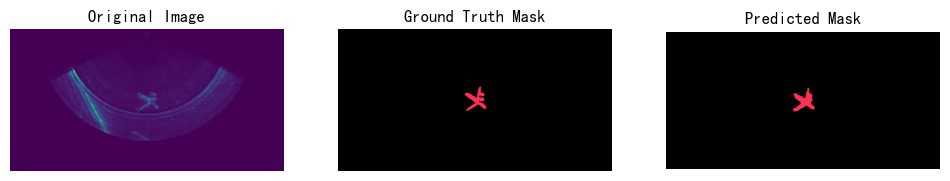

Average Dice Score: 0.9079


In [8]:
dir = "./test"
img_name = "img_002476"
model = Unet(3).to("cuda")
model.load_model("unet_v1.pt")
show_results(dir, img_name, model, tx1)
evaluate("./test", model)


## mean = 0.5, std = 0.5

In [ ]:
tx2 = torchvision.transforms.Compose([
        torchvision.transforms.CenterCrop((512, 1024)),
        torchvision.transforms.ToTensor(),
    ])
model = Unet(3)
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
train_dataset2 = Images_Dataset_folder(train_images_path, train_labels_path, tx2)
val_dataset2 = Images_Dataset_folder(val_images_path, val_labels_path, tx2)
train_datalaoader2 = torch.utils.data.DataLoader(train_dataset2, batch_size=4, shuffle=True)
val_dataloader2 = torch.utils.data.DataLoader(val_dataset2, batch_size=4, shuffle=False)
loss_fn = soft_dice_loss()
evaluator = hard_dice_score()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 20

In [ ]:
train(model, device, train_datalaoader2, val_dataloader2, loss_fn, evaluator, optimizer, epochs)
model.save_model("model2.pt")

In [ ]:
dir = "./test"
img_name = "img_002942"
model = Unet(3)
model = model.to("cuda")
model.load_model("model3.pt")
show_results(dir, img_name, model, tx2)

In [ ]:
model = Unet(3)
model = model.to("cuda")
model.load_model("model2.pt")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
train(model, device, train_datalaoader2, val_dataloader2, loss_fn, evaluator, optimizer, 10)
show_results(dir, img_name, model, tx2)
model.save_model("model3.pt")

In [ ]:
model.save_model("model3.pt")